In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
import pandas as pd
import glob
from os import listdir
path = "/content/drive/My Drive"
anger_csv = glob.glob(path+"/datasetcsv/anger/*.csv")
disgust_csv = glob.glob(path+"/datasetcsv/disgust/*.csv")
fear_csv = glob.glob(path+"/datasetcsv/fear/*.csv")
happiness_csv = glob.glob(path+"/datasetcsv/happiness/*.csv")
relief_csv = glob.glob(path+"/datasetcsv/relief/*.csv")
sadness_csv = glob.glob(path+"/datasetcsv/sadness/*.csv")
surprise_csv = glob.glob(path+"/datasetcsv/surprise/*.csv")
dirlist=listdir(path+"/datasetcsv")
csvlist_name=[anger_csv,disgust_csv,fear_csv,happiness_csv,relief_csv,sadness_csv,surprise_csv]
for name in csvlist_name:
    print(len(name))

742
850
670
689
732
722
726


In [14]:
import pandas as pd
processed_list2 = []
name_list_count = 0
featrues_labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for direction in dirlist:
    csv_list = glob.glob(path+"/datasetcsv/"+direction+"/*.csv")
    count = 0

    for csv_file in csv_list:
        df = pd.read_csv(csv_file, sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
        df['final_result'] = featrues_labels[name_list_count]
        df['gif_count'] = count
        count += 1
        processed_list2.append(df)
        #gif_count also can represent as rank
        if count>=25:
          break
    name_list_count+= 1 

In [15]:
all_processed2 = pd.concat(processed_list2)
all_processed2.to_csv("all_processed_save4.csv")
all_processed2

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,final_result,gif_count
0,17,0,0.64,0.88,1,0.085927,0.158350,-0.983637,-0.078466,0.137369,-0.987407,0.004,0.149,257.1,257.9,259.4,260.7,261.2,260.5,258.9,257.5,255.1,256.1,257.4,259.0,260.5,261.6,262.4,261.3,260.0,258.5,257.1,255.9,258.4,259.0,259.7,260.0,259.8,259.2,258.6,...,-0.002,-0.003,-0.002,0.14,0.00,1.18,1.96,1.03,0.00,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.24,0.0,0.0,0.18,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,anger,0
1,18,0,0.68,0.88,1,0.046716,0.253587,-0.966184,-0.113528,0.232071,-0.966051,-0.035,0.246,254.8,255.6,257.1,258.5,258.9,258.1,256.5,255.2,252.9,253.8,255.1,256.7,258.2,259.4,260.1,259.0,257.6,256.1,254.8,253.6,256.1,256.7,257.4,257.7,257.6,257.0,256.3,...,-0.017,0.001,-0.002,0.00,0.00,0.00,0.98,0.48,0.16,0.14,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0
2,19,0,0.72,0.77,1,0.046288,0.300638,-0.952614,-0.127618,0.277483,-0.952217,-0.043,0.295,252.3,253.1,254.7,256.1,256.5,255.7,254.0,252.7,250.3,251.2,252.6,254.2,255.8,257.0,257.7,256.6,255.2,253.7,252.2,251.1,253.6,254.3,254.9,255.3,255.1,254.5,253.8,...,-0.004,-0.004,-0.006,0.00,0.67,0.00,1.06,0.69,0.00,0.00,0.00,0.00,0.62,0.05,0.00,0.30,0.01,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,anger,0
3,20,0,0.76,0.32,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,252.2,253.0,254.5,255.9,256.3,255.5,253.9,252.5,250.2,251.1,252.4,254.0,255.6,256.8,257.5,256.4,255.0,253.5,252.1,251.0,253.5,254.1,254.8,255.1,255.0,254.4,253.7,...,-0.001,-0.001,-0.001,1.32,1.16,0.98,1.04,0.55,0.00,0.00,0.58,0.93,2.02,0.52,2.05,0.95,0.65,0.0,0.0,0.44,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,anger,0
4,21,0,0.80,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,252.8,253.7,255.2,256.6,256.8,256.0,254.4,253.1,250.9,251.8,253.1,254.6,256.2,257.3,258.1,257.0,255.5,254.0,252.7,251.6,254.1,254.7,255.3,255.7,255.6,255.0,254.3,...,0.001,0.001,0.000,1.72,1.67,1.65,0.74,1.18,0.00,0.00,1.54,1.23,0.96,0.00,1.73,0.00,0.89,0.0,0.0,0.51,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,anger,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,38,0,2.96,0.98,1,-0.103859,0.378749,-0.919653,-0.357031,0.341967,-0.869245,-0.252,0.383,164.0,165.9,169.4,172.6,173.5,171.9,168.1,165.0,159.1,161.6,164.8,168.5,172.0,174.6,176.3,174.0,171.0,167.5,164.2,161.2,167.1,168.5,170.0,170.8,170.4,169.0,167.5,...,-0.033,-0.079,-0.018,0.00,0.00,0.19,0.00,0.96,0.50,0.04,0.16,1.17,1.32,0.00,0.97,0.16,0.92,0.0,0.0,1.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,surprise,24
14,39,0,3.04,0.93,1,-0.126936,0.388719,-0.912570,-0.379437,0.348504,-0.857072,-0.279,0.395,160.9,162.8,166.3,169.3,170.2,168.5,164.8,161.8,156.2,158.6,161.7,165.2,168.7,171.2,172.9,170.6,167.6,164.2,161.0,158.2,163.9,165.2,166.7,167.5,167.2,165.8,164.3,...,-0.019,-0.074,-0.022,0.00,0.00,0.58,

In [16]:
def filter_low_confidence(df, level=0.0):
    df = df[(df["confidence"] >= level)& (df['success'] == 1)]
    df = df[df['face_id'] == 0]
    return df
all_processed_cleaned2 = all_processed2.reset_index().drop(["index"], axis=1)
all_processed_filtered2 = filter_low_confidence(all_processed_cleaned2, level=0.5)
all_processed_filtered2

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,final_result,gif_count
0,17,0,0.64,0.88,1,0.085927,0.158350,-0.983637,-0.078466,0.137369,-0.987407,0.004,0.149,257.1,257.9,259.4,260.7,261.2,260.5,258.9,257.5,255.1,256.1,257.4,259.0,260.5,261.6,262.4,261.3,260.0,258.5,257.1,255.9,258.4,259.0,259.7,260.0,259.8,259.2,258.6,...,-0.002,-0.003,-0.002,0.14,0.00,1.18,1.96,1.03,0.00,0.00,0.00,0.46,0.00,0.00,0.00,0.00,0.24,0.00,0.00,0.18,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,anger,0
1,18,0,0.68,0.88,1,0.046716,0.253587,-0.966184,-0.113528,0.232071,-0.966051,-0.035,0.246,254.8,255.6,257.1,258.5,258.9,258.1,256.5,255.2,252.9,253.8,255.1,256.7,258.2,259.4,260.1,259.0,257.6,256.1,254.8,253.6,256.1,256.7,257.4,257.7,257.6,257.0,256.3,...,-0.017,0.001,-0.002,0.00,0.00,0.00,0.98,0.48,0.16,0.14,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,anger,0
2,19,0,0.72,0.77,1,0.046288,0.300638,-0.952614,-0.127618,0.277483,-0.952217,-0.043,0.295,252.3,253.1,254.7,256.1,256.5,255.7,254.0,252.7,250.3,251.2,252.6,254.2,255.8,257.0,257.7,256.6,255.2,253.7,252.2,251.1,253.6,254.3,254.9,255.3,255.1,254.5,253.8,...,-0.004,-0.004,-0.006,0.00,0.67,0.00,1.06,0.69,0.00,0.00,0.00,0.00,0.62,0.05,0.00,0.30,0.01,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,anger,0
26,43,0,1.68,0.88,1,0.092383,0.214822,-0.972274,-0.051777,0.239398,-0.969540,0.021,0.230,175.0,175.7,177.7,179.9,181.0,180.6,178.3,176.1,172.8,173.6,175.1,177.3,179.8,181.8,183.4,181.9,179.8,177.6,175.6,173.9,177.3,178.3,179.1,179.4,178.9,178.0,177.1,...,-0.014,-0.000,-0.004,1.69,0.55,0.34,0.41,0.31,0.00,0.00,0.00,0.60,1.49,1.93,1.80,0.23,0.49,1.36,0.76,0.34,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,anger,0
27,44,0,1.72,0.98,1,0.108259,0.273443,-0.955777,-0.051196,0.287401,-0.956441,0.030,0.285,174.4,175.1,177.1,179.3,180.3,179.7,177.5,175.3,172.1,173.0,174.5,176.7,179.1,181.0,182.5,181.0,178.9,176.8,174.8,173.2,176.6,177.5,178.4,178.7,178.3,177.3,176.4,...,-0.013,-0.035,-0.038,1.30,0.95,0.20,0.28,0.51,0.00,0.00,0.00,1.08,2.29,1.56,2.61,0.44,0.13,1.08,1.53,0.41,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,anger,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,38,0,2.96,0.98,1,-0.103859,0.378749,-0.919653,-0.357031,0.341967,-0.869245,-0.252,0.383,164.0,165.9,169.4,172.6,173.5,171.9,168.1,165.0,159.1,161.6,164.8,168.5,172.0,174.6,176.3,174.0,171.0,167.5,164.2,161.2,167.1,168.5,170.0,170.8,170.4,169.0,167.5,...,-0.033,-0.079,-0.018,0.00,0.00,0.19,0.00,0.96,0.50,0.04,0.16,1.17,1.32,0.00,0.97,0.16,0.92,0.00,0.00,1.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,surprise,24
4944,39,0,3.04,0.93,1,-0.126936,0.388719,-0.912570,-0.379437,0.348504,-0.857072,-0.279,0.395,160.9,162.8,166.3,169.3,170.2,168.5,164.8,161.8,156.2,158.6,161.7,165.2,168.7,171.2,172.9,170.6,167.6,164.2,161.0,158.2,163.9,165.2,166.7,167.5,167.2,165.8,164.3,...,-0.019,-0

In [22]:
categories = set()
featrues_labels = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
for item in featrues_labels:
    categories.update(item.split("/"))

category_df_data = {item:[] for item in categories}
for row in all_processed_filtered2['final_result']:
    for item in categories:
        if item == row:
            category_df_data[item].append(1)
        else:
            category_df_data[item].append(0)
featrues_label =pd.DataFrame(category_df_data)

In [23]:
all_processed_features = all_processed_filtered2[['confidence', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r',
       'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r',
       'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r',
       'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c',
       'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c',
       'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c',
       'AU45_c', 'final_result', 'gif_count','frame']]
featrues_label

,sad,surprise,fear,happy,neutral,disgust,anger
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
3233,0,1,0,0,0,0,0
3234,0,1,0,0,0,0,0
3235,0,1,0,0,0,0,0
3236,0,1,0,0,0,0,0


In [80]:
from sklearn.model_selection import train_test_split
X_r = all_processed_features.iloc[:,1:18]
X_c = all_processed_features.iloc[:,18:36]
y = featrues_label

X_r_train, X_r_test, y_train, y_test = train_test_split(X_r, y, test_size=0.33, random_state=98)
X_c_train, X_c_test, y_train, y_test = train_test_split(X_c, y, test_size=0.33, random_state=98)

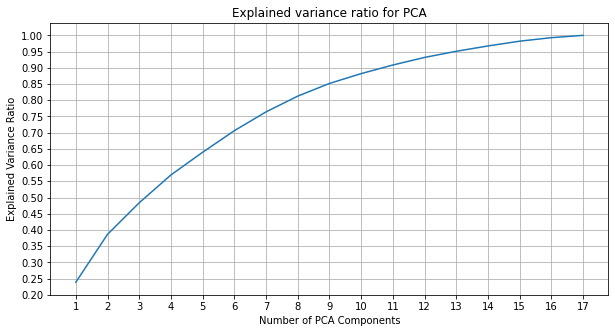

In [25]:
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt
can_n_components = range(1, 18, 1)
ratios = []
for n in can_n_components:
    pca = PCA(n_components=n)
    X_r_pca = pca.fit_transform(X_r)
    ratios.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(can_n_components, ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.2, 1.05, .05))
plt.xticks(np.arange(1, 18, 1));

In [79]:
n = 13
pca_r = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(X_r_train)
X_r_train_pca = pca_r.transform(X_r_train)
X_r_test_pca = pca_r.transform(X_r_test)
n = 13
pca_c = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(X_c_train)
X_c_train_pca = pca_c.transform(X_c_train)
X_c_test_pca = pca_c.transform(X_c_test)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
print("Searching the best parameters for SVC...")
param_grid = {
    "estimator__C": np.arange(10,100,10),
    "estimator__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.0025, 0.01],
    "estimator__class_weight": [None, "balanced"],
    "estimator__decision_function_shape": ["ovo", "ovr"],
    "estimator__probability": [True, False]
}
clf = GridSearchCV(
        SVC()
    , 
    param_grid, 
    verbose=1, 
    n_jobs=32
)
clf = clf.fit(X_r_train_pca, y_train)
print(f"Best parameters for SVC: {clf.best_params_}")

Searching the best parameters for SVC...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 386 tasks      | elapsed:  9.8min
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed: 18.7min
[Parallel(n_jobs=32)]: Done 1186 tasks      | elapsed: 30.2min
[Parallel(n_jobs=32)]: Done 1736 tasks      | elapsed: 43.9min
[Parallel(n_jobs=32)]: Done 2160 out of 2160 | elapsed: 55.1min finished


Best parameters for SVC: {'estimator__C': 90, 'estimator__class_weight': None, 'estimator__decision_function_shape': 'ovo', 'estimator__gamma': 0.01, 'estimator__probability': True}


In [33]:
clf.best_estimator_.score(X_r_test_pca, y_test)

0.6557530402245089

In [53]:
best_params=clf.best_params_
best_params

{'estimator__C': 90,
 'estimator__class_weight': None,
 'estimator__decision_function_shape': 'ovo',
 'estimator__gamma': 0.01,
 'estimator__probability': True}

In [59]:
from sklearn import svm
from sklearn import datasets
import pickle
X, y= datasets.load_iris(return_X_y=True)
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X_r_train_pca[0:1])


from joblib import dump, load
dump(clf, 'model_result.joblib') 

['model_result.joblib']

In [69]:
classification = load('model_result.joblib') 
classification.predict(X_r_test_pca)
classification.score(X_r_test_pca, y_test)

0.6557530402245089

In [ ]:
X_c = all_processed_features.iloc[:,18:36]
X_c_train, X_c_test, y_train, y_test = train_test_split(X_c, y, test_size=0.33, random_state=98)

In [96]:
from sklearn.model_selection import train_test_split
X_r = all_processed_features.iloc[:,1:18]

y = featrues_label

X_r_train, X_r_test, y_train, y_test = train_test_split(X_r, y, test_size=0.33, random_state=98)

n = 13
pca_r = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(X_r_train)
X_r_train_pca = pca_r.transform(X_r_train)
X_r_test_pca = pca_r.transform(X_r_test)
y_train

ValueError: ignored

In [94]:
param_grid = {
    "C": np.arange(80,100,10),
    "gamma": [0.0025, 0.01], #0.0001, 0.0005, 0.001, 0.005,
    "class_weight": [None],
    "decision_function_shape": ["ovo"],
    "probability": [True]
}
clf = GridSearchCV(
        SVC()
    , 
    param_grid, 
    verbose=1, 
    n_jobs=6
)
clf = clf.fit(X_r_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    1.0s finished


ValueError: ignored

In [37]:
from sklearn import svm
classification = svm.SVC(C=90, break_ties=False, cache_size=200,
            class_weight=None, coef0=0.0,
            decision_function_shape='ovo', degree=3,
            gamma=0.01, kernel='rbf', max_iter=-1,
            probability=True, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [52]:
# classification.fit(X_r_train_pca, y_train)
X_r_train_pca

array([[ 1.82811574, -0.38562137, -1.07326277, ...,  1.48787479,
         1.08107248,  0.39068495],
       [ 1.27890579,  0.30934006,  0.11962298, ..., -0.04968226,
        -1.82029515, -1.45676816],
       [ 2.21026268,  0.27569978, -1.0677915 , ...,  0.09530208,
         1.30975946,  0.8618156 ],
       ...,
       [-0.20510773, -0.11692058,  0.56702526, ...,  0.80806799,
        -0.04354294,  1.14533418],
       [-0.3585796 , -0.35530217,  0.60085486, ...,  0.37089429,
        -0.51008856,  1.06307812],
       [ 0.11266699, -0.56137319, -0.99481481, ..., -1.2991835 ,
         0.7120961 ,  0.58620194]])

In [ ]:
classification.score(X_r_test_pca, y_test)